In [1]:
import mne                                                              # Librería de python para explorar, visualizar,
mne.set_log_level('WARNING')                                            # y analizar datos neurofisiológicos humanos.
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb                                                    
color = ['green', 'blue','red','cyan', 'magenta', 'yellow','k','w']     # Paleta de colores para diferenciar las ondas

import a_funciones as a_fun                                             # Funciones Alex

xlabel = 'Muestra'                                                      # Abscisas
ylabel = 'Amplitud (uV)'                                                # Ordenadas

#### Análisis de la señal ERPTemplate
ERPTemplate contiene sólo un array útil para éste estudio: 'routput'.  
'routput' contiene dos señales *template* ERP (vienen 8 canales en una misma señal) que están bien y  
que serán modificadas en su sampleo de frecuencia de 256Hz a 250Hz.  


-----------------------------------------
ERPTemplate:
1. Encabezado :  ['__globals__', '__header__', '__version__', 'routput']
2. Tipo :  <class 'dict'>


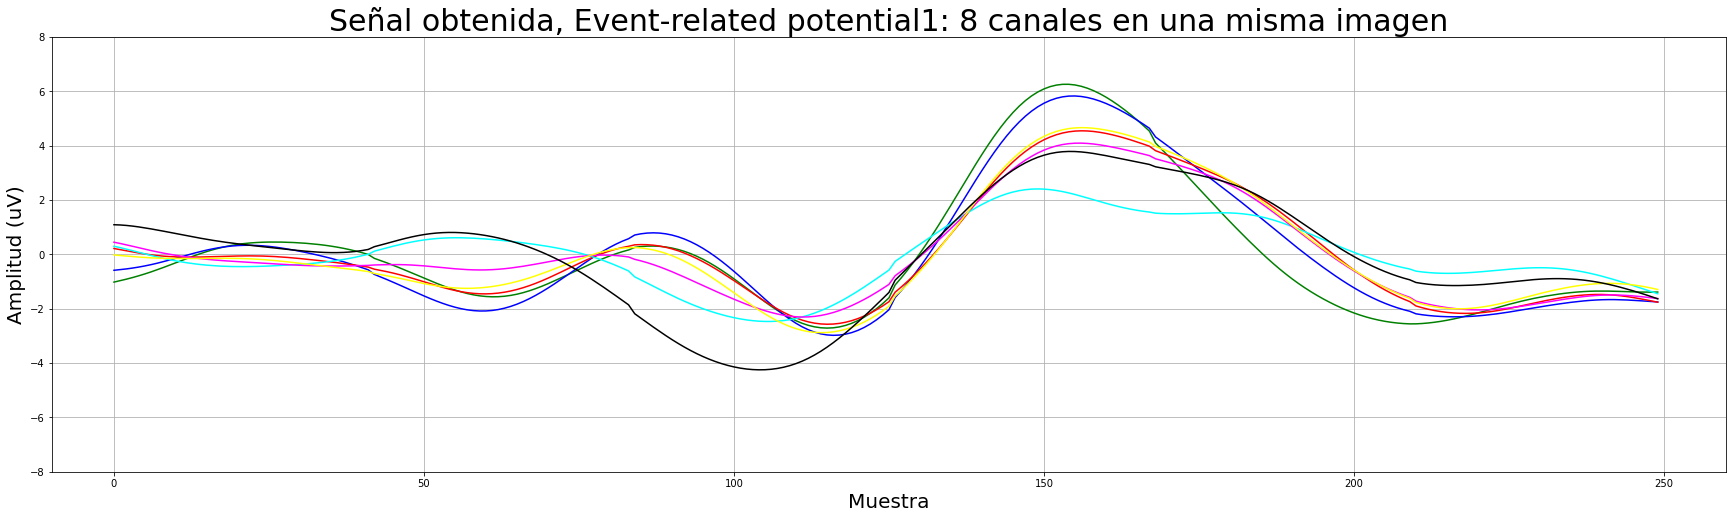

()

In [2]:
ERPTemplate = scipy.io.loadmat('./dataset/ERPTemplate.mat') 
print("-----------------------------------------")   
print("ERPTemplate:")   
print("1. Encabezado : ", sorted(ERPTemplate))                                      #Informativo
print("2. Tipo : ", type(ERPTemplate))
routput = ERPTemplate['routput']
erptemplate1 = routput[0][7][0][1][0][0][0][7] 
erptemplate1 = np.delete( erptemplate1, range(0,256,43),0)
df_erptemplate1 = a_fun.to_df(erptemplate1)

data_frame = df_erptemplate1
titulo = 'Señal obtenida, Event-related potential1: 8 canales en una misma imagen'
dir_savefig = "./a_images/ERPTemplate01.jpg"
xlabel = 'Muestra'
ylabel = 'Amplitud (uV)'
a_fun.grafic_8cherp(data_frame, titulo, xlabel, ylabel, dir_savefig)